In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset
import matplotlib.pyplot as plt  # 맷플롯립사용



--- 
 - 소프트맥스 회귀 구현하기 
   - 이번 챕터에서는 소프트맥스 회귀를 로우-레벨과 F.cross_entropy를 사용해서 구현해보겠습니다. 


--- 
 - 소프트맥스 회귀 구현하기(로우-레벨) 



x_train : 
    torch.Size([8, 4]) tensor([[1., 2., 1., 1.],
            [2., 1., 3., 2.],
            [3., 1., 3., 4.],
            [4., 1., 5., 5 ...

y_train : 
    torch.Size([8]) tensor([2, 2, 2, 1, 1, 1, 0, 0])

y_one_hot : 
    torch.Size([8, 3]) tensor([[0., 0., 1.],
            [0., 0., 1.],
            [0., 0., 1.],
            [0., 1., 0.],
            [0., ...

-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 8.788898 
accuracy : 0.38 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 11.492296 
accuracy : 0.62 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 35.407791 
accuracy : 0.50 

-------------------------------------------------------------------------------- 
epoch :  300/2000 
cost : 29.777805 
accuracy : 0.50 

-----------------------------------------------------------------------------

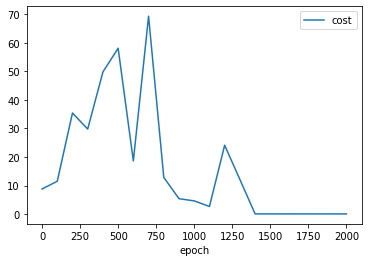

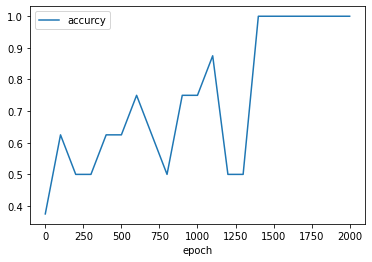

W : 
    torch.Size([4, 3]) tensor([[-25.4676,   1.1833,  24.2843],
            [ -5.6205,  -2.7394,   8.3598],
            [ 25.9863,   ...

b : 
    torch.Size([1]) tensor([1.0875e-06])



In [2]:

torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [2, 2, 2, 1, 1, 1, 0, 0]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

mu.log("x_train", x_train)
mu.log("y_train", y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(dim=1, index=y_train.unsqueeze(dim=1), value=1)
mu.log("y_one_hot", y_one_hot)

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr=0.1)
nb_epoches = 2000
mu.plt_init()

for epoch in range(nb_epoches + 1):
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)
    cost = (y_one_hot * -torch.log(hypothesis)).sum().mean()
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        accuracy = mu.get_cross_entropy_accuracy(hypothesis, y_train)
        mu.log_epoch(epoch, nb_epoches, cost, accuracy)

mu.plt_show()
mu.log("W", W)
mu.log("b", b)



--- 
 - 소프트맥스 회귀 구현하기(하이-레벨) 
   - 이제는 F.cross_entropy()를 사용하여 비용 함수를 구현해보겠습니다. 
   - 주의할 점은 F.cross_entropy()는 그 자체로 소프트맥스 함수를 포함하고 있으므로 
   - 가설에서는 소프트맥스 함수를 사용할 필요가 없습니다. 


-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 1.098612 
accuracy : 0.38 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 0.761050 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 0.689991 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  300/2000 
cost : 0.643229 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  400/2000 
cost : 0.604117 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  500/2000 
cost : 0.568255 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  600/2000 
cost : 0.533922 
accuracy : 0.75 

------------------------------------------------

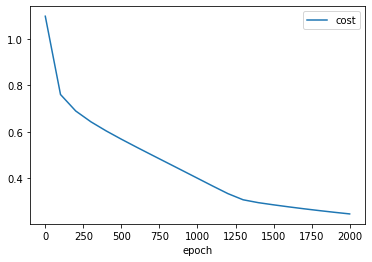

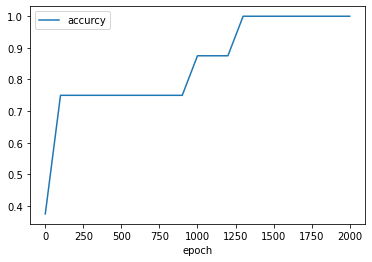

W : 
    torch.Size([4, 3]) tensor([[-5.1426, -0.2341,  5.3767],
            [-1.0979, -0.6527,  1.7506],
            [ 3.7815, -0.8266, ...

b : 
    torch.Size([1]) tensor([1.8486e-08])



In [3]:


W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr=0.1)
nb_epoches = 2000
mu.plt_init()

for epoch in range(nb_epoches + 1):
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        accuracy = mu.get_cross_entropy_accuracy(z, y_train)
        mu.log_epoch(epoch, nb_epoches, cost, accuracy)

mu.plt_show()
mu.log("W", W)
mu.log("b", b)



--- 
 - 소프트맥스 회귀 nn.Module로 구현하기 
   - 이번에는 nn.Module로 소프트맥스 회귀를 구현해봅시다. 
   - 선형 회귀에서 구현에 사용했던 nn.Linear()를 사용합니다. 
   - output_dim이 1이었던 선형 회귀때와 달리 output_dim은 이제 클래스의 개수여야 합니다. 


-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 1.616785 
accuracy : 0.25 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 0.658891 
accuracy : 0.62 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 0.573443 
accuracy : 0.62 

-------------------------------------------------------------------------------- 
epoch :  300/2000 
cost : 0.518151 
accuracy : 0.62 

-------------------------------------------------------------------------------- 
epoch :  400/2000 
cost : 0.473265 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  500/2000 
cost : 0.433516 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  600/2000 
cost : 0.396563 
accuracy : 0.75 

------------------------------------------------

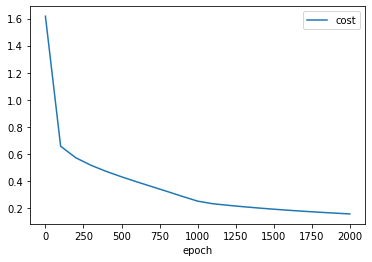

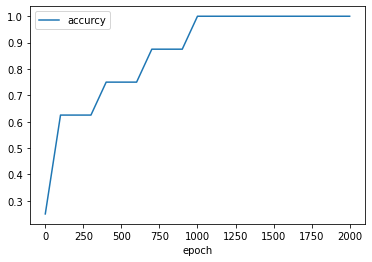

model : 
    Linear(in_features=4, out_features=3, bias=True) 
    weight    torch.Size([3, 4])
        tensor([[-4.1603, -0.5770,  3.7125, -1.1282],
            [ 0.6676, -0.1765, -0.8148,  1.6878],
             ...
    bias    torch.Size([3])
        tensor([-3.3105, -1.3642,  4.6260])



In [4]:


model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)
nb_epoches = 2000
mu.plt_init()

for epoch in range(nb_epoches + 1):
    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        accuracy = mu.get_cross_entropy_accuracy(prediction, y_train)
        mu.log_epoch(epoch, nb_epoches, cost, accuracy)

mu.plt_show()
mu.log("model", model)




--- 
 - 소프트맥스 회귀 클래스로 구현하기 
   - 이제 소프트맥스 회귀를 nn.Module을 상속받은 클래스로 구현해봅시다. 


-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 2.637636 
accuracy : 0.25 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 0.647903 
accuracy : 0.62 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 0.564643 
accuracy : 0.62 

-------------------------------------------------------------------------------- 
epoch :  300/2000 
cost : 0.511043 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  400/2000 
cost : 0.467249 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  500/2000 
cost : 0.428281 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  600/2000 
cost : 0.391924 
accuracy : 0.75 

------------------------------------------------

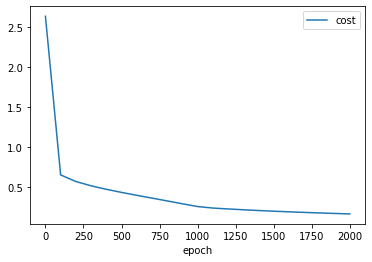

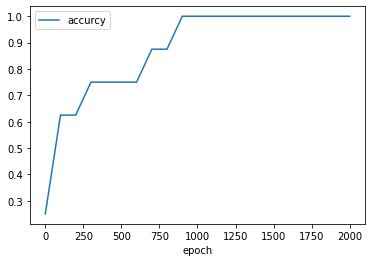

model : 
    SoftmaxClassificationModel(
      (linear): Linear(in_features=4, out_features=3, bias=True)
    ) 
    linear.weight    torch.Size([3, 4])
        tensor([[-4.1677, -0.6300,  3.6527, -1.1639],
            [ 0.8438, -0.2194, -0.9243,  1.7005],
             ...
    linear.bias    torch.Size([3])
        tensor([-3.2074, -1.5044,  4.8048])



In [5]:


class SoftmaxClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)

    def forward(self, x):
        res = self.linear(x)
        return res


model = SoftmaxClassificationModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)
nb_epoches = 2000
mu.plt_init()

for epoch in range(nb_epoches + 1):
    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        accuracy = mu.get_cross_entropy_accuracy(prediction, y_train)
        mu.log_epoch(epoch, nb_epoches, cost, accuracy)

mu.plt_show()
mu.log("model", model)